In [41]:
import gsd
import fresnel
import gsd.hoomd
import math
import numpy as np

In [42]:

# This is not intended as a full tutorial on fresnel - see the
# fresnel user documentation (https://fresnel.readthedocs.io/) if you would like to learn more.

import io
import warnings

import fresnel
import IPython
import numpy
import packaging.version
import PIL

device = fresnel.Device()
tracer = fresnel.tracer.Path(device=device, w=300, h=300)

FRESNEL_MIN_VERSION = packaging.version.parse("0.13.0")
FRESNEL_MAX_VERSION = packaging.version.parse("0.14.0")


protein = np.array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
       286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
       338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
       364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
       377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
       429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,
       442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
       455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,
       468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480,
       481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493,
       494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506,
       507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519,
       520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532,
       533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,
       546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558,
       559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571,
       572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584,
       585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597,
       598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610,
       611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623,
       624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636,
       637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649,
       650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,
       689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701,
       702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714,
       715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727,
       728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740,
       741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753,
       754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766,
       767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779,
       780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792,
       793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805,
       806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818,
       819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831,
       832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844,
       845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857,
       858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870,
       871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883,
       884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896,
       897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909,
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922,
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953])

def render(snapshot, particles=None, is_solid=None, indices=None):
    if ('version' not in dir(fresnel) or packaging.version.parse(
            fresnel.version.version) < FRESNEL_MIN_VERSION
            or packaging.version.parse(
                fresnel.version.version) >= FRESNEL_MAX_VERSION):
        warnings.warn(
            f"Unsupported fresnel version {fresnel.version.version} - expect errors."
        )
    vertices = [
        (-0.5, 0, 0),
        (0.5, 0, 0),
        (0, -0.5, 0),
        (0, 0.5, 0),
        (0, 0, -0.5),
        (0, 0, 0.5),
    ]
    # poly_info = fresnel.util.convex_polyhedron_from_vertices(vertices)
    N = snapshot.particles.N if indices is None else len(indices)
    L = snapshot.configuration.box[0]
    if particles is not None:
        N = len(particles)
    if is_solid is not None:
        N = int(numpy.sum(is_solid))

    scene = fresnel.Scene(device)
    # geometry = fresnel.geometry.ConvexPolyhedron(scene, poly_info, N=N)
    geometry = fresnel.geometry.Sphere(
        scene,
        N=N,
        radius = .05
    )
    geometry.material = fresnel.material.Material(color=fresnel.color.linear(
        [0.01, 0.74, 0.26]),
                                                  roughness=0.5)
    if indices is None:
        geometry.position[:] = snapshot.particles.position[:] 
    else:
        geometry.position[:protein.shape[0]] = snapshot.particles.position[:protein.shape[0]] 
    # if particles is None and is_solid is None:
    #     geometry.position[:] = snapshot.particles.position[:]
    #     geometry.orientation[:] = snapshot.particles.orientation[:]
    # elif particles is not None:
    #     geometry.position[:] = snapshot.particles.position[particles, :]
    #     geometry.orientation[:] = snapshot.particles.orientation[particles, :]
    # elif is_solid is not None:
    #     geometry.position[:] = snapshot.particles.position[numpy.ix_(
    #         is_solid, [0, 1, 2])]
    #     geometry.orientation[:] = snapshot.particles.orientation[numpy.ix_(
    #         is_solid, [0, 1, 2, 3])]

    geometry.outline_width = 0.01
    box = fresnel.geometry.Box(scene,
                               snapshot.configuration.box,
                               box_radius=.02)

    scene.lights = [
        fresnel.light.Light(direction=(0, 0, 1),
                            color=(0.8, 0.8, 0.8),
                            theta=math.pi),
        fresnel.light.Light(direction=(1, 1, 1),
                            color=(1.1, 1.1, 1.1),
                            theta=math.pi / 3)
    ]
    scene.camera = fresnel.camera.Orthographic(position=(L * 2, L, L * 2),
                                               look_at=(0, 0, 0),
                                               up=(0, 1, 0),
                                               height=L * 1.4 + 1)
    scene.background_color = (1, 1, 1)
    return tracer.sample(scene, samples=500)


def render_movie(frames, particles=None, is_solid=None, indices = None):
    if is_solid is None:
        is_solid = [None] * len(frames)
    a = render(frames[0], indices=indices)

    im0 = PIL.Image.fromarray(a[:, :, 0:3], mode='RGB').convert(
        "P", palette=PIL.Image.Palette.ADAPTIVE)
    ims = []
    for i, f in enumerate(frames[1:]):
        a = render(f, indices=indices)
        im = PIL.Image.fromarray(a[:, :, 0:3], mode='RGB')
        im_p = im.quantize(palette=im0)
        ims.append(im_p)

    blank = numpy.ones(shape=(im0.height, im0.width, 3), dtype=numpy.uint8) * 255
    im = PIL.Image.fromarray(blank, mode='RGB')
    im_p = im.quantize(palette=im0)
    ims.append(im_p)

    f = io.BytesIO()
    im0.save(f, 'gif', save_all=True, append_images=ims, duration=1000, loop=0)

    size = len(f.getbuffer()) / 1024
    if (size > 3000):
        warnings.warn(f"Large GIF: {size} KiB")
    return IPython.display.display(IPython.display.Image(data=f.getvalue()))

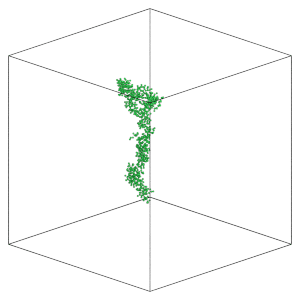

In [43]:
traj = gsd.hoomd.open('trajectory.gsd')
render_movie(traj, indices = protein)